In [22]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
pip install yellowbrick

In [3]:
pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.7/484.7 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 46.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 33.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 14.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 45.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 57.3 MB/s e

In [1]:
import os
os.environ["OMP_NUM_THREADS"] = '1'

In [23]:
# Importing the dataset
shoppers_intentions = pd.read_csv('online_shoppers_intention.csv')

In [24]:
shoppers_intentions.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [25]:
shoppers_intentions.shape

(12330, 18)

In [26]:
shoppers_intentions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [7]:
# Check for features with null records
shoppers_intentions.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [8]:
shoppers_intentions.describe(include="all").transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Administrative,12330.0,NaN,NaN,NaN,2.315166,3.321784,0.0,0.0,1.0,4.0,27.0
Administrative_Duration,12330.0,NaN,NaN,NaN,80.818611,176.779107,0.0,0.0,7.5,93.25625,3398.75
Informational,12330.0,NaN,NaN,NaN,0.503569,1.270156,0.0,0.0,0.0,0.0,24.0
Informational_Duration,12330.0,NaN,NaN,NaN,34.472398,140.749294,0.0,0.0,0.0,0.0,2549.375
ProductRelated,12330.0,NaN,NaN,NaN,31.731468,44.475503,0.0,7.0,18.0,38.0,705.0
ProductRelated_Duration,12330.0,NaN,NaN,NaN,1194.74622,1913.669288,0.0,184.1375,598.936905,1464.157214,63973.52223
BounceRates,12330.0,NaN,NaN,NaN,0.022191,0.048488,0.0,0.0,0.003112,0.016813,0.2
ExitRates,12330.0,NaN,NaN,NaN,0.043073,0.048597,0.0,0.014286,0.025156,0.05,0.2
PageValues,12330.0,NaN,NaN,NaN,5.889258,18.568437,0.0,0.0,0.0,0.0,361.763742
SpecialDay,12330.0,NaN,NaN,NaN,0.061427,0.198917,0.0,0.0,0.0,0.0,1.0


In [27]:
shoppers_intentions.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
12325    False
12326    False
12327    False
12328    False
12329    False
Length: 12330, dtype: bool

In [28]:
shoppers_intentions.duplicated().sum()

125

In [29]:
# Drop duplicate rows based on all columns
shoppers_intentions_no_duplicates = shoppers_intentions.drop_duplicates()

In [30]:
# Display the DataFrame after dropping duplicates
print("\nshoppers_intentions after dropping duplicates:")
shoppers_intentions_no_duplicates.info()


shoppers_intentions after dropping duplicates:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 12205 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12205 non-null  int64  
 1   Administrative_Duration  12205 non-null  float64
 2   Informational            12205 non-null  int64  
 3   Informational_Duration   12205 non-null  float64
 4   ProductRelated           12205 non-null  int64  
 5   ProductRelated_Duration  12205 non-null  float64
 6   BounceRates              12205 non-null  float64
 7   ExitRates                12205 non-null  float64
 8   PageValues               12205 non-null  float64
 9   SpecialDay               12205 non-null  float64
 10  Month                    12205 non-null  object 
 11  OperatingSystems         12205 non-null  int64  
 12  Browser                  12205 non-null  int64  
 13  Region                   122

<ipython-input-13-e4177f5918d1>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(shoppers_intentions_no_duplicates.corr(),annot=True,lw=.5,center=0,cmap="YlGnBu")


<AxesSubplot: >

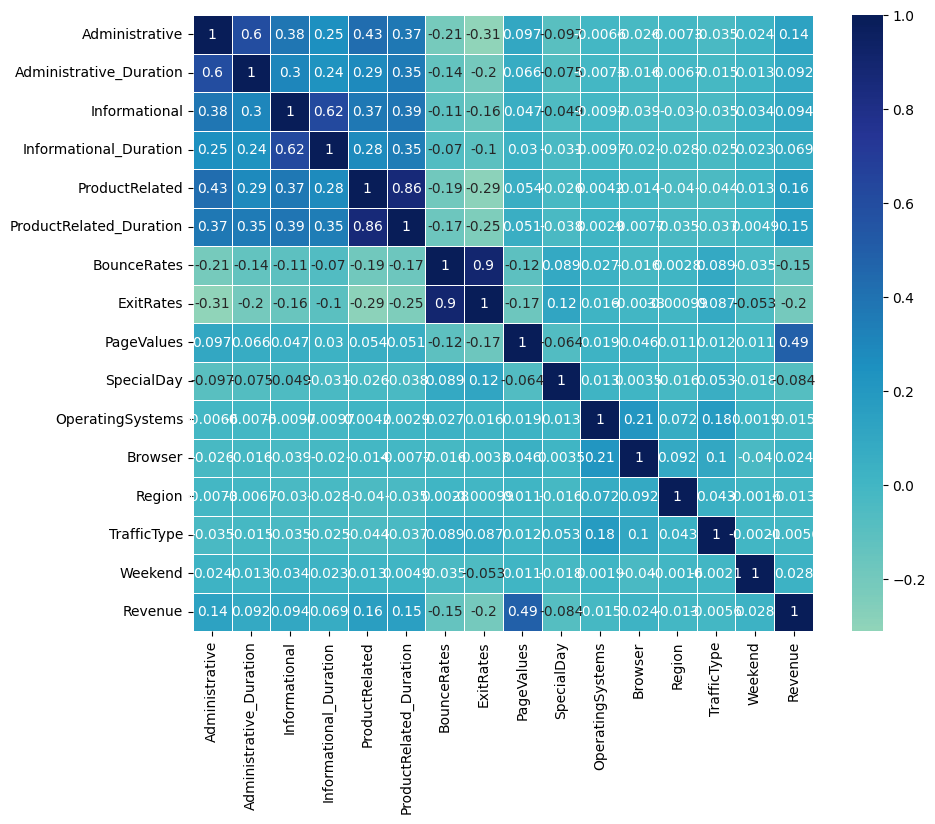

In [13]:
# Visualization of Dataset
plt.figure(figsize=(10,8))
sns.heatmap(shoppers_intentions_no_duplicates.corr(),annot=True,lw=.5,center=0,cmap="YlGnBu")

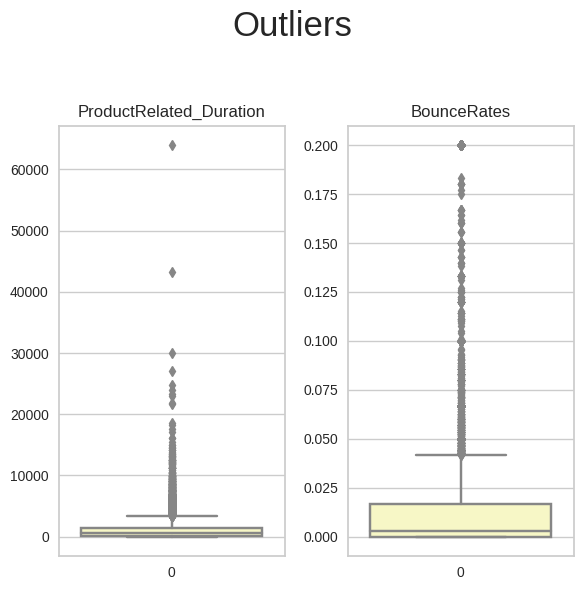

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(6,6))
fig.suptitle('Outliers\n', size = 25)

sns.boxplot(ax=axes[0], data=shoppers_intentions_no_duplicates['ProductRelated_Duration'], palette='Spectral').set_title("ProductRelated_Duration")
sns.boxplot(ax=axes[1], data=shoppers_intentions_no_duplicates['BounceRates'], palette='Spectral').set_title("BounceRates")

plt.tight_layout()

In [ ]:
sns.pairplot(shoppers_intentions_no_duplicates.iloc[:,[0,1,2,3,4,5,6,7,8,9,11,12,13,14]])

Output hidden; open in https://colab.research.google.com to view.

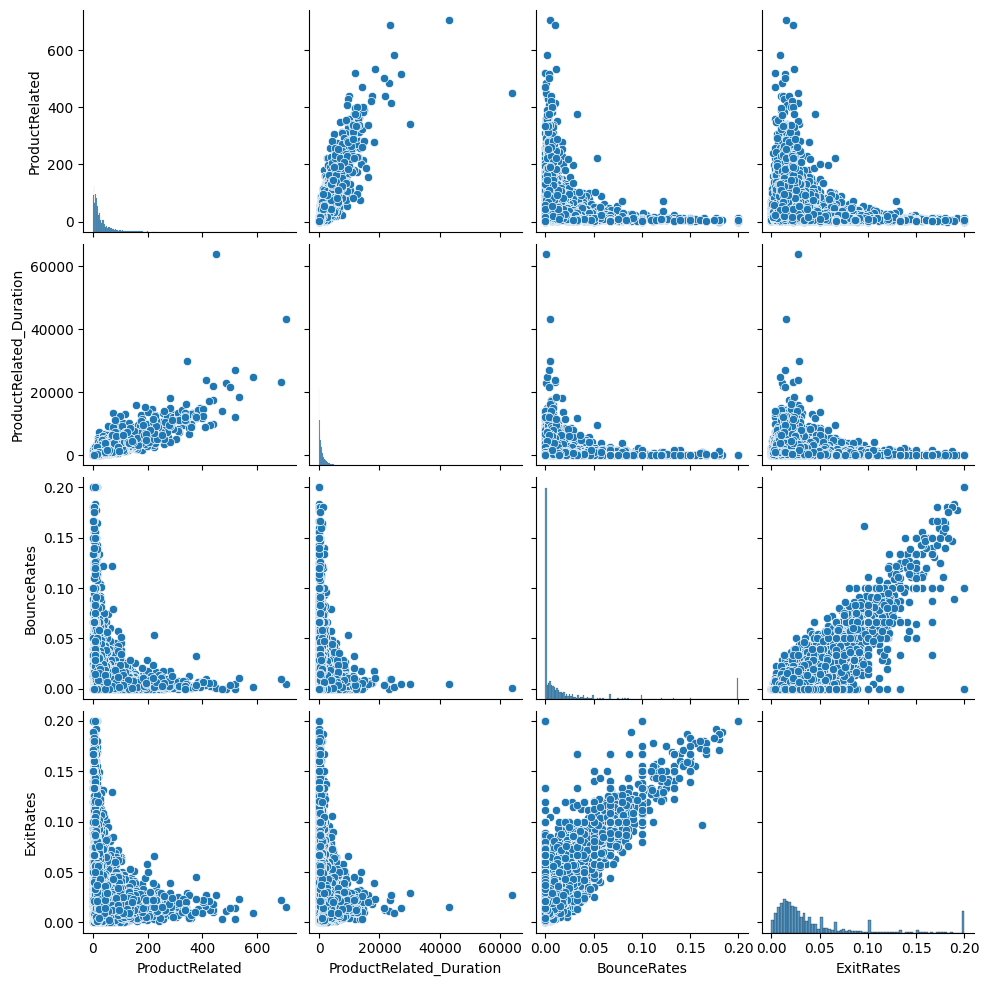

In [15]:
sns.pairplot(shoppers_intentions_no_duplicates.iloc[:,4:8])

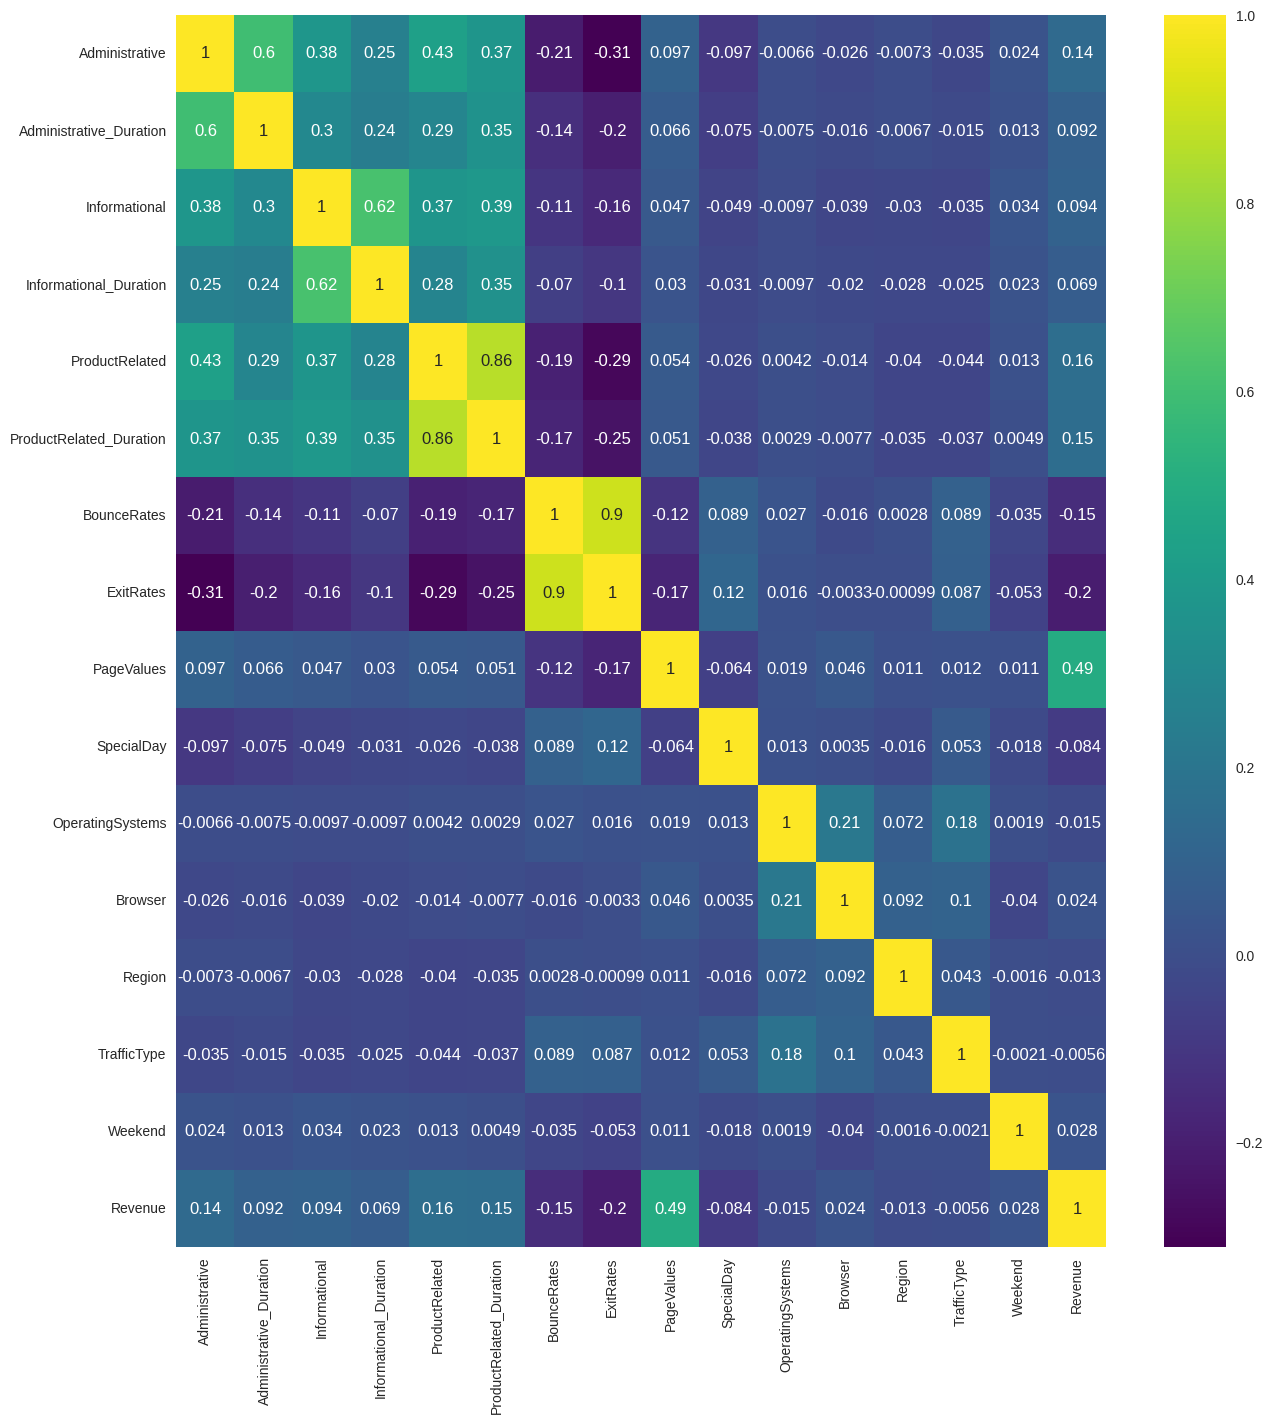

In [ ]:
plt.figure(figsize=(15,16))
ax = sns.heatmap(shoppers_intentions_no_duplicates.corr(),annot = True, cmap = 'viridis')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
X = shoppers_intentions_no_duplicates.iloc[:, [5,6]].values
sc_X = StandardScaler()
X = sc_X.fit_transform(X)

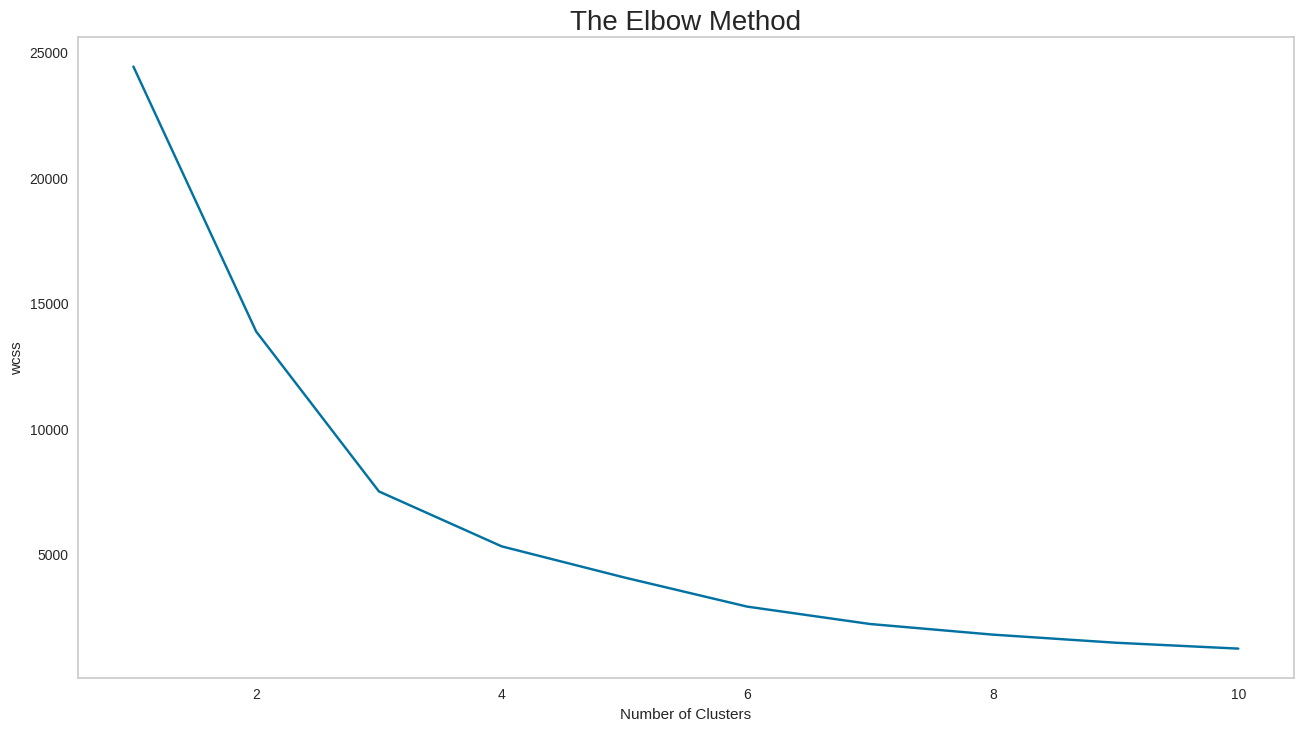

In [ ]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i,
              init = 'k-means++',
              max_iter = 300,
              n_init = 10,
              random_state = 0,
              algorithm = 'full',
              tol = 0.001)
    km.fit(X)
    labels = km.labels_
    wcss.append(km.inertia_)

plt.rcParams['figure.figsize'] = (13, 7)
plt.plot(range(1, 11), wcss)
plt.grid()
plt.tight_layout()
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')
plt.show()

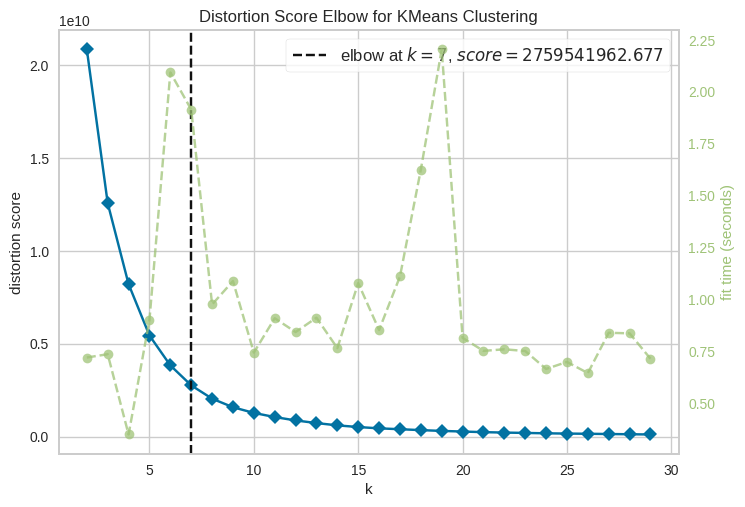

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import warnings

with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=FutureWarning)
    model = KMeans(n_init=10, random_state=42)
    visualizer = KElbowVisualizer(model, k=(2, 30), timings=True)
    visualizer.fit(shoppers_intentions_no_duplicates.iloc[:,[5,6]])
    visualizer.show()

In [ ]:
# Fitting K-Means to the dataset
from sklearn.cluster import KMeans
import warnings

with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=FutureWarning)
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=42, n_init=10)
    y_kmeans = kmeans.fit_predict(X)


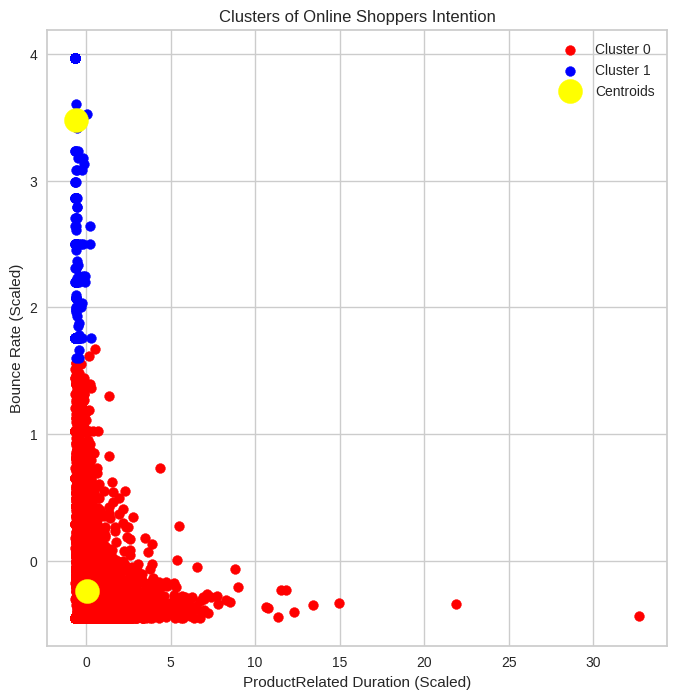

In [ ]:
# Displaying the various clusters in different colours
plt.figure(figsize=(8,8))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0,1], s = 50, c = 'red', label = 'Cluster 0')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1,1], s = 50, c = 'blue', label = 'Cluster 1')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of Online Shoppers Intention')
plt.xlabel('ProductRelated Duration (Scaled)')
plt.ylabel('Bounce Rate (Scaled)')
plt.legend()
plt.show()

Adjusted rand index: 
-0.07018746251044976


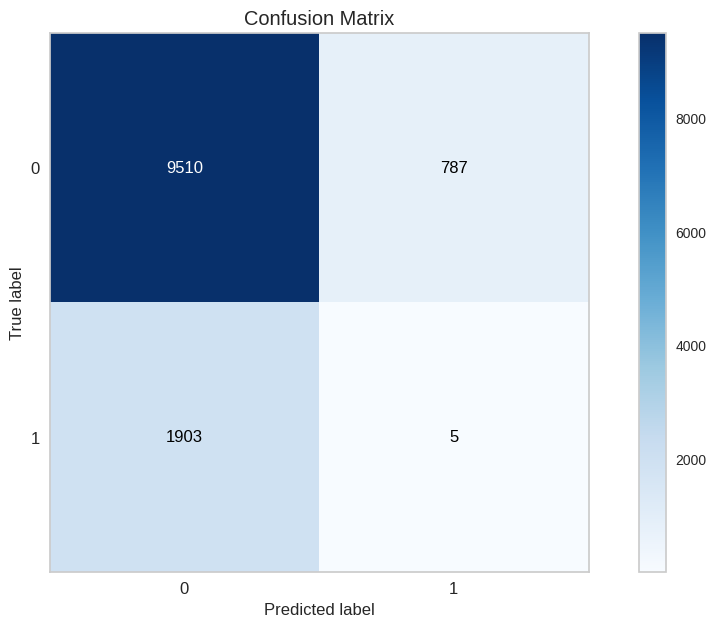

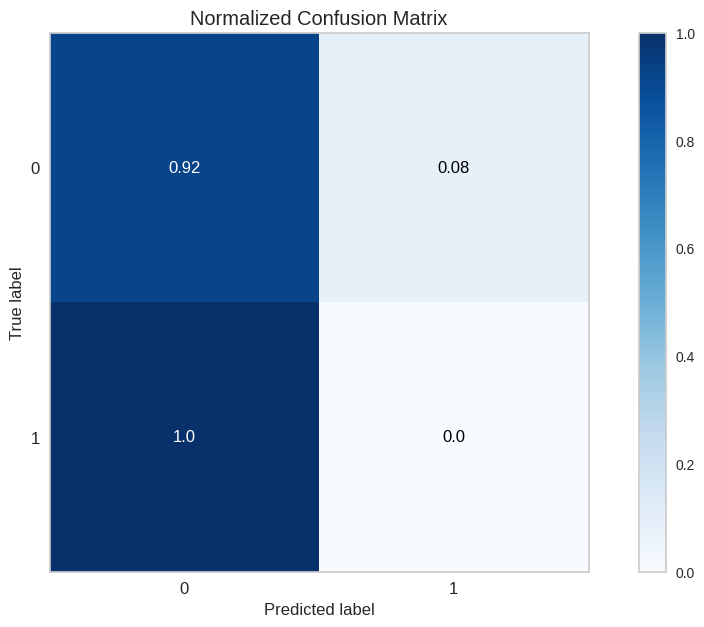

In [ ]:
# encode Revenue as actual label
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
labels_true = le.fit_transform(shoppers_intentions_no_duplicates['Revenue'])
labels_pred = y_kmeans

from sklearn import metrics
score = metrics.adjusted_rand_score(labels_true, labels_pred)
print("Adjusted rand index: ")
print(score)

import scikitplot as skplt
plt_1 = skplt.metrics.plot_confusion_matrix(labels_true, labels_pred, normalize=False)
plt_2 = skplt.metrics.plot_confusion_matrix(labels_true, labels_pred, normalize=True)

In [ ]:
# Hierarchical Clustering

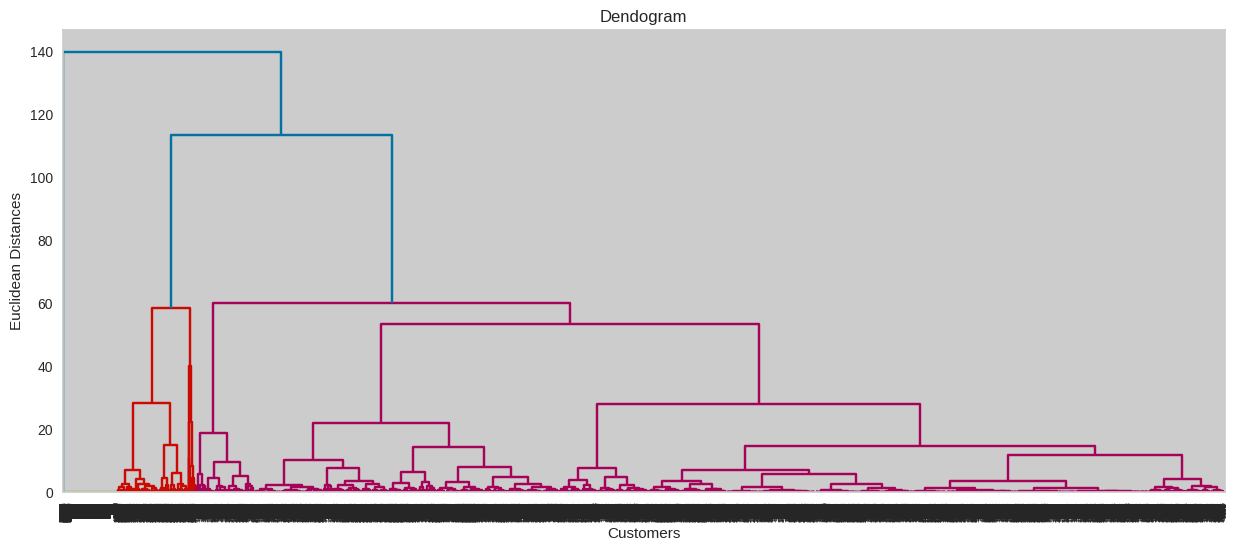

In [ ]:
# Using dendogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(15,6))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.show()

In [ ]:
# Fitting hierarchical clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

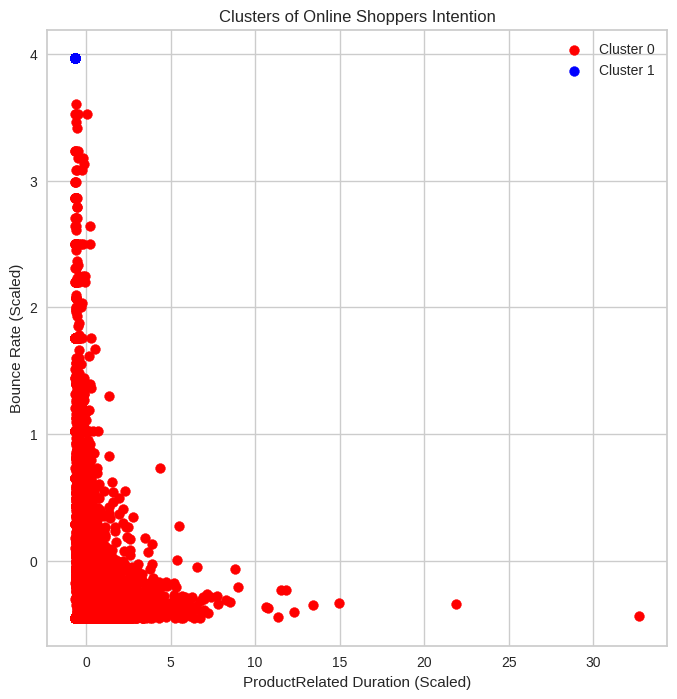

In [ ]:
# Visualising the clusters in different colours
plt.figure(figsize=(8,8))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0,1], s = 50, c = 'red', label = 'Cluster 0')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1,1], s = 50, c = 'blue', label = 'Cluster 1')

plt.title('Clusters of Online Shoppers Intention')
plt.xlabel('ProductRelated Duration (Scaled)')
plt.ylabel('Bounce Rate (Scaled)')
plt.legend()
plt.show()

Adjusted rand indexHC: 
-0.056589282057779924


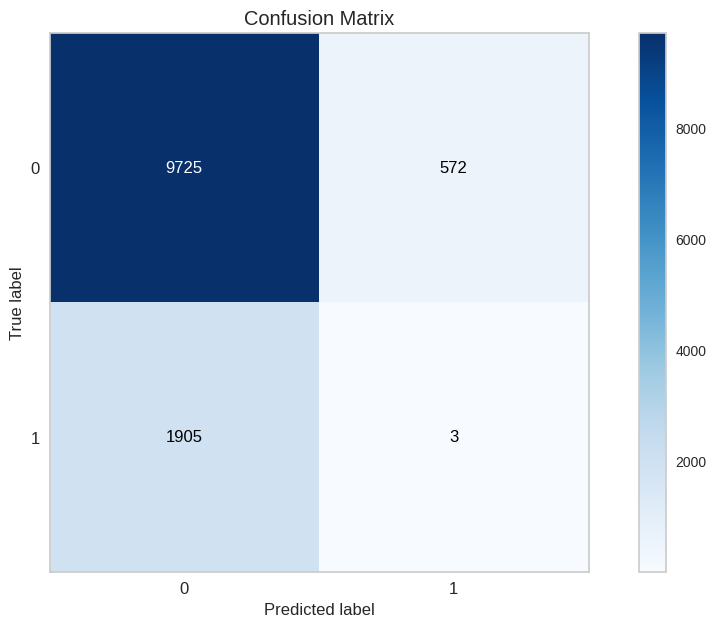

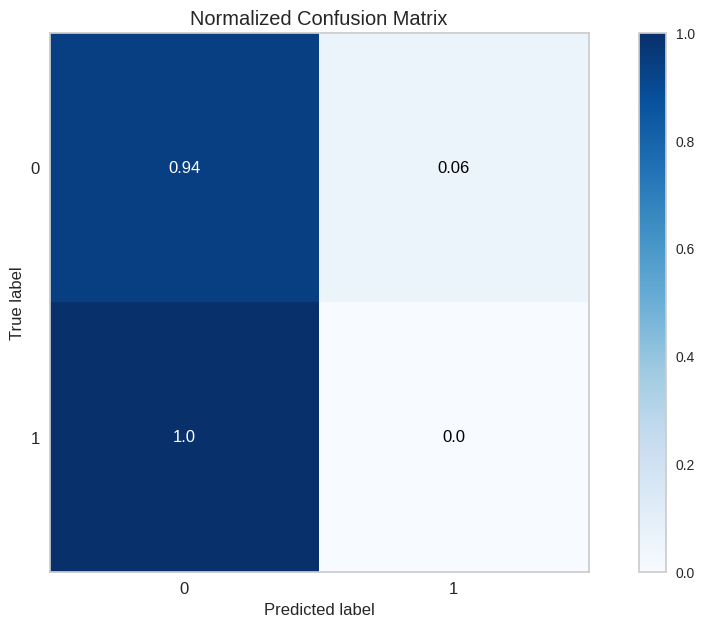

In [ ]:
# encode Revenue as actual label
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
labels_true = le.fit_transform(shoppers_intentions_no_duplicates['Revenue'])
labels_predHC = y_hc

from sklearn import metrics
score = metrics.adjusted_rand_score(labels_true, labels_predHC)
print("Adjusted rand indexHC: ")
print(score)

import scikitplot as skplt
plt_1 = skplt.metrics.plot_confusion_matrix(labels_true, labels_predHC, normalize=False)
plt_2 = skplt.metrics.plot_confusion_matrix(labels_true, labels_predHC, normalize=True)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K-means Silhouette Score: 0.5817500491982808


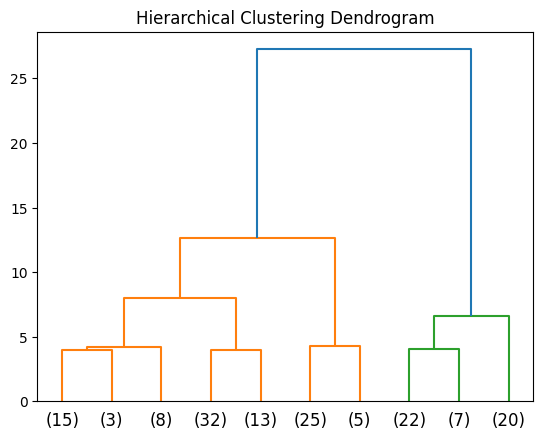

Hierarchical Silhouette Score: 0.5770346019475988


In [20]:
# Silhouette Score to Compare both Models

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Standardize the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# K-means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X_std)
kmeans_silhouette = silhouette_score(X_std, kmeans_labels)
print(f"K-means Silhouette Score: {kmeans_silhouette}")

# Hierarchical clustering
linkage_matrix = linkage(X_std, method='ward')  # Ward linkage minimizes the variance between clusters
dendrogram(linkage_matrix, truncate_mode='lastp', p=10, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

# Cut the dendrogram to form clusters
num_clusters = 2
hierarchical_labels = AgglomerativeClustering(n_clusters=num_clusters, linkage='ward').fit_predict(X_std)
hierarchical_silhouette = silhouette_score(X_std, hierarchical_labels)
print(f"Hierarchical Silhouette Score: {hierarchical_silhouette}")
